# A Recurrent Network Mechanism of Time Integration in Perceptual Decisions
Wong,  Wang
Journal of Neuroscience, January 2006, 26(4):1212-1328

## Material and Methods
### The full network model

### Calling Library Fuctions

In [1]:
# LIBRARY

import numpy as np # vector manipulation
import math  # math functions
import sys

# THIS IS FOR PLOTTING
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import warnings
warnings.filterwarnings("ignore")


### The Reduced Network Model
#### Firing rate
$$ H_i=\frac{a x_i-b}{(1-exp[-d(ax_i-b)]}$$

$$ a=207 (VnC)^{-1},$$
$$ b=108Hz,$$
$$ d=0.154s$$

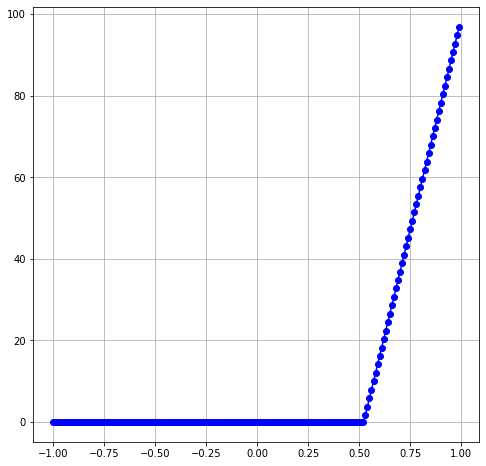

In [45]:
def H(x):
    a=207
    b=108
    d=154
    f=(a*x-b)/(1-np.exp(-d*(a*x-b)))
    return f

c_temp=np.arange(-1,1,0.01)


fig = plt.figure(figsize=(8,8))

plt.plot(c_temp,H(c_temp),'-o',color='blue',label="S_1")
plt.grid()
plt.show()

### Neural Circuit
$$ x_{1}=J_{11}S_1-J_{12}S_2+I_{0}+I_{1}+I_{noise,1}$$
$$ x_{2}=J_{22}S_2-J_{21}S_1+I_{0}+I_{2}+I_{noise,1}$$

where the synaptic couplings are $J_{11}=0.2609$, $J_{22}=0.2609$, $J_{12}=0.0497$ and $J_{21}=0.0497$.
$I_{0}=0.3255 nA$ represents external input 


In [46]:
def total_synaptic_current(S_L,S_R,I_L,I_R,I_noise_L,I_noise_R):
    # Synaptic coupling
    J_LL=0.2609 # nA 0.3725#
    J_RR=J_LL#0.2609 # nA
    J_LR=0.0497 # nA 0.1137#
    J_RL=J_LR#0.0497 # nA
    I_0=0.3255  # nA 0.3297#
    x_L=J_LL*S_L-J_LR*S_R+I_0+I_L+I_noise_L
    x_R=J_RR*S_R-J_RL*S_L+I_0+I_R+I_noise_R
    return x_L, x_R


### Background activity
$$ \tau_{AMPA}\frac{d I_{noise,i}(t)}{dt} =-I_{noise,i}(t)+\eta_i(t)\sqrt{\tau_{AMPA}}\sigma_{noise}$$
$$ \tau_{AMPA}=2ms,$$
$$ \sigma_{noise}=0.02,$$

In [90]:
def Background_Activity(I_noise,h):
    sigma_noise=0.02 # nA0.009#
    tau_AMPA=2 #ms
    eta_noise=0*np.random.normal(0,1,1)
    I_0=0.0#.3297#0.3255  # nA
    I_noise_new=I_noise+h/tau_AMPA*(-(I_noise-I_0)+eta_noise
                                *np.sqrt(tau_AMPA)*sigma_noise)
    return I_noise_new

### Network Dynamics
$$ \frac{d S_{i}}{dt} =\frac{-S_{i}}{\tau_S}+(1-S_i)\gamma H(x_i))$$
$$\tau_S=100ms$$
$$\gamma=0.641$$

In [91]:
def S_diff(S,x,h):
    tau_S=100 #ms
    𝛾=0.641
    S_new=S+h*((-S/tau_S)+(1-S)*𝛾*x)
    return S_new

### Input Current Target

$$ I_i=J_{A,ext}\mu_0\left(1\pm \frac{c'}{100} \right) $$


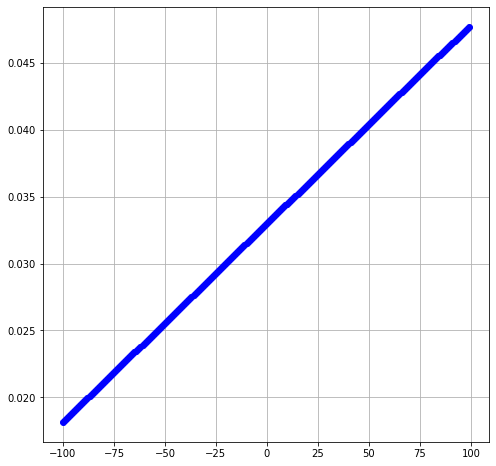

In [92]:
def I_input_1(c_dash):
    J_A_ext=1.1/1000# nA/Hz
    mu_0=30 # Hz
    f=0.45
    I_motion=J_A_ext*mu_0*(1+f*(c_dash)/100)
    return I_motion

c_temp=np.arange(-100,100,1)


fig = plt.figure(figsize=(8,8))

plt.plot(c_temp,I_input_1(c_temp),'-o',color='blue',label="S_1")
plt.grid()
plt.show()


In [93]:
h=1
I_0=0.3255+0.2609 # nA


time=np.arange(0,2000,h)
J_A_ext=1.1/1000 # nA/Hz
mu_0=30.0
I_noise_L=0.4*np.random.normal(0,1,len(time))
I_noise_R=0.4*np.random.normal(0,1,len(time))

x_L=J_A_ext*mu_0*np.random.uniform(0,1,len(time))
x_R=J_A_ext*mu_0*np.random.uniform(0,1,len(time))

S_L=0.6+0.4*np.random.uniform(0,1,len(time))#+ 0.2*np.random.normal(0,1,len(time))
S_R=0.6+0.4*np.random.uniform(0,1,len(time))#+0.2*np.random.normal(0,1,len(time))

I_L=I_0*np.ones(len(time)) # np.zeros((1,len(time)))
I_R=I_0*np.ones(len(time)) # np.zeros((1,len(time)))
Firing_target_L=mu_0*np.ones((len(time)))
Firing_target_R=mu_0*np.ones((len(time)))



In [94]:
c_dash=0.0

for i in range (0,len(time)-1):
    if time[i] >=300 and time[i]<1000:
        c_dash=10.0
    else:
        c_dash=0.0
    
    
    Firing_target_L[i]=H(x_L[i])
    Firing_target_R[i]=H(x_R[i])
    
    I_noise_L[i+1]=Background_Activity(I_noise_L[i],h)
    I_noise_R[i+1]=Background_Activity(I_noise_R[i],h)
    
    I_L[i+1]=I_input_1(c_dash)
    I_R[i+1]=I_input_1(-c_dash)
   
    x_L[i+1],x_R[i+1]=total_synaptic_current(S_L[i],S_R[i],I_L[i],I_R[i],I_noise_L[i],I_noise_R[i])
    S_L[i+1]=S_diff(S_L[i],x_L[i],h)
    S_R[i+1]=S_diff(S_R[i],x_R[i],h)
   


### Plotting
#### Input

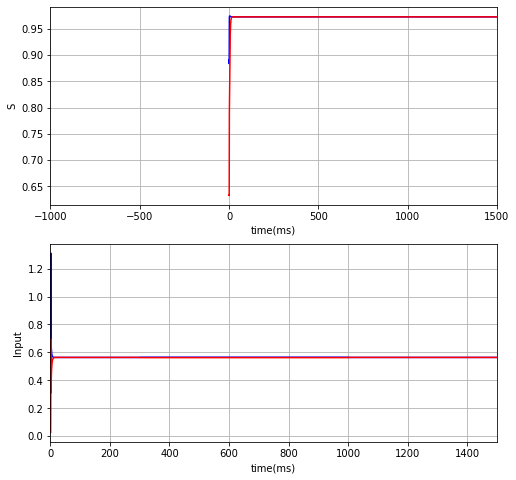

In [95]:
fig = plt.figure(figsize=(8,8))
plt.subplot(211)
plt.plot(time,S_L,'-',color='blue',label="S_L")
plt.plot(time,S_R,'-',color='red',label="S_R")
plt.grid()
plt.xlim((-1000,1500))
plt.xlabel('time(ms)')
plt.ylabel('S')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.subplot(212)
plt.plot(time,x_L,'-',color='blue',label="x_L")
plt.plot(time,x_R,'-',color='red',label="x_R")
plt.grid()
plt.xlabel('time(ms)')
plt.ylabel('Input')
plt.xlim((0,1500))
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#plt.ylim((30,50))
plt.show()



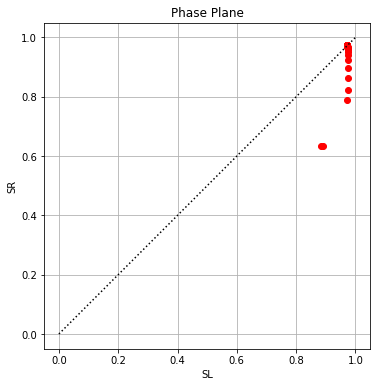

In [96]:
fig = plt.figure(figsize=(6,6))
plt.plot(S_L,S_R,'o',color='red')
plt.plot([0,1],[0,1],':k')
plt.grid()
plt.xlabel('SL')
plt.ylabel('SR')
plt.title('Phase Plane')
plt.axis('square')
plt.show()


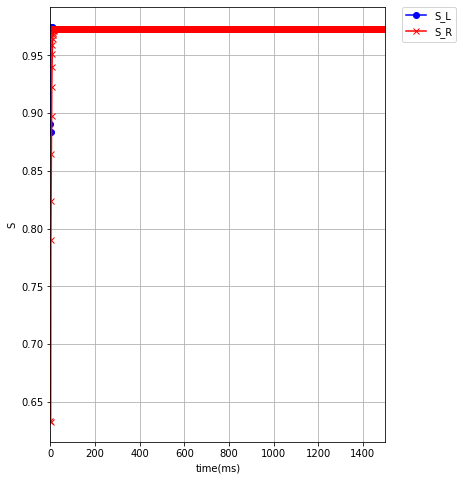

In [97]:
fig = plt.figure(figsize=(6,8))
plt.plot(time,S_L,'-o',color='blue',label="S_L")
plt.plot(time,S_R,'-x',color='red',label="S_R")
plt.grid()
plt.xlim((0,1500))
plt.xlabel('time(ms)')
plt.ylabel('S')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



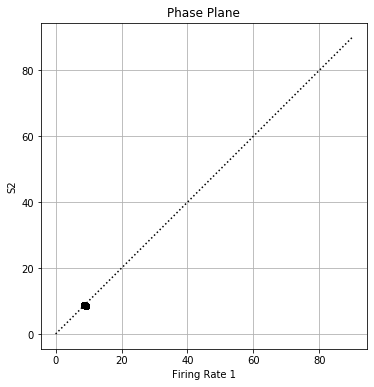

In [98]:
fig = plt.figure(figsize=(6,6))
plt.plot(Firing_target_L[range (500,len(time)-1)],Firing_target_R[range (500,len(time)-1)],'o',color='black')
plt.plot([0,90],[0,90],':k')
plt.grid()
plt.xlabel('Firing Rate 1')
plt.ylabel('S2')
plt.title('Phase Plane')
plt.axis('square')
plt.show()



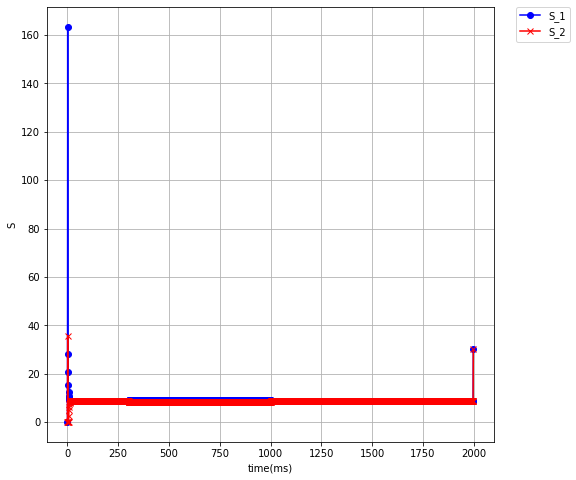

In [99]:
fig = plt.figure(figsize=(8,8))
plt.plot(time,Firing_target_L,'-o',color='blue',label="S_1")
plt.plot(time,Firing_target_R,'-x',color='red',label="S_2")
plt.grid()
plt.xlabel('time(ms)')
plt.ylabel('S')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


